# A simple Stochastic Gradient Descent model
- Exercise based on the Lesson 2 of fastai v1 DL course that explains the Stochastic Gradient Descent optimization method, which is commonly used in neural networks.
- fastai v1 package used, but could just import pytorch, matplotlib and numpy manually.

In [1]:
%matplotlib inline
from fastai.basics import *

The goal of linear regression is to fit a line to a set of points.

In [5]:
n=100

In [6]:
X = torch.ones(n, 2) # 100 rows of 2 columns
X[:5]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [7]:
X[:, 0].uniform_(-1,1)
X[:5]

tensor([[ 0.5565,  1.0000],
        [ 0.2152,  1.0000],
        [-0.8031,  1.0000],
        [-0.8847,  1.0000],
        [-0.0986,  1.0000]])

In [8]:
a = tensor(3.,2); a

tensor([3., 2.])

In [9]:
y = X@a + torch.rand(n) #matrix Multiplication between X & a tensors with addition of randomness

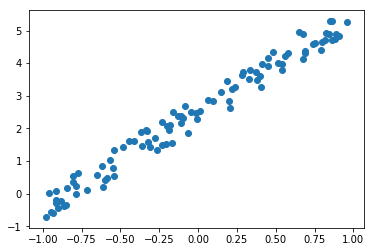

In [10]:
plt.scatter(X[:,0], y);

In [11]:
# defining our metric
def mse(y_hat, y): return ((y_hat - y)**2).mean()

### let's test with a hypothetical "a" tensor of (-1.0, 1.0)

In [12]:
a = tensor(-1.,1)

In [14]:
# first prediction
y_hat = X@a

In [15]:
mse(y_hat, y)

tensor(7.2564)

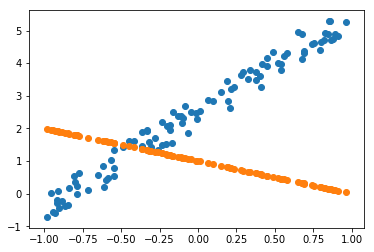

In [16]:
plt.scatter(X[:,0], y);
plt.scatter(X[:,0], y_hat);

In [17]:
a = nn.Parameter(a); a ## converts a_test to be a Tensor Parameter

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [18]:
### let's create a function that systematically updates the 'a_test' coefficients by the derivative and learning rate, 
###  and then calculates the predictor values (y_hat) and calculates the mse/losses

def update():
    y_hat = X@a
    loss = mse(y, y_hat)
    if t % 10== 0: print(loss) ## prints the losses every 10 iteration
    loss.backward() ## activates pytorch to calculate gradient for the past few predictors
    with torch.no_grad():
        a.sub_(lr * a.grad) ## subtracts the a_test values in-place by a factor of lr * gradient (gradient as the "loss function")
        a.grad.zero_() ## zerorize the gradient

In [19]:
## let's create a loop for 100 times, updating the "a" each time using the update() function
lr = 1e-1 ## initialize the learning rate
for t in range(100): update()

tensor(7.2564, grad_fn=<MeanBackward0>)
tensor(1.4175, grad_fn=<MeanBackward0>)
tensor(0.3987, grad_fn=<MeanBackward0>)
tensor(0.1559, grad_fn=<MeanBackward0>)
tensor(0.0970, grad_fn=<MeanBackward0>)
tensor(0.0827, grad_fn=<MeanBackward0>)
tensor(0.0792, grad_fn=<MeanBackward0>)
tensor(0.0784, grad_fn=<MeanBackward0>)
tensor(0.0781, grad_fn=<MeanBackward0>)
tensor(0.0781, grad_fn=<MeanBackward0>)


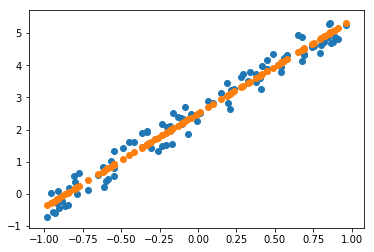

In [20]:
plt.scatter(X[:,0], y);
plt.scatter(X[:,0], X@a.detach().numpy()) ##  var.detach().numpy() because we turned it into Tensor Parameter
                                          ##   earlier (which required gradient)

### Animate this!

In [22]:
a = nn.Parameter(tensor(-1.,1)); a #resetting the parameter again

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [23]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

fig = plt.figure() #initialize matplotlib figure
plt.scatter(X[:,0], y, c='orange') # plotting the data
line, = plt.plot(X[:,0], X@a.detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata(X@a.detach().numpy())
    return line,

In [24]:
animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)